In [5]:
import gwpy
from gwpy.timeseries import TimeSeries
import lal

sampling_frequency = 2048

trigger_time = 1187058325.0

channel = f"H1:DCH-CLEAN_STRAIN_C02"

kwargs = dict(
    start=trigger_time-3,
    end=trigger_time+1,
    verbose=False,
    allow_tape=True,
)

type_kwargs = dict(
    dtype="float64",
    subok=True,
    copy=False,
)
data = gwpy.timeseries.TimeSeries.get(channel, **kwargs).astype(
        **type_kwargs)

# Resampling timeseries to sampling_frequency using lal.
lal_timeseries = data.to_lal()
lal.ResampleREAL8TimeSeries(
    lal_timeseries, float(1/sampling_frequency)
)
data = TimeSeries(
    lal_timeseries.data.data,
    epoch=lal_timeseries.epoch,
    dt=lal_timeseries.deltaT
)
    

In [6]:
from gwpy.signal.filter_design import bandpass, concatenate_zpks, notch


bandpass_frequencies=(50, 250)

zpks = []

zpks.append(bandpass(
                bandpass_frequencies[0], bandpass_frequencies[1],
                sampling_frequency))
zpk = concatenate_zpks(*zpks)
strain_H1 = data.filter(zpk, filtfilt=False)

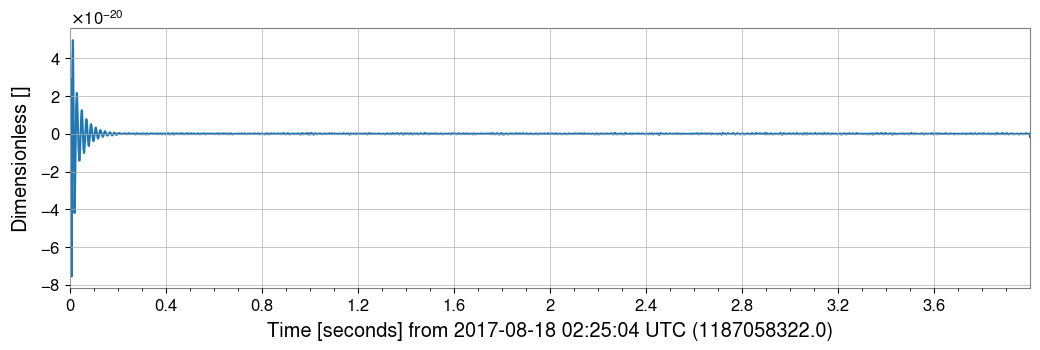

In [7]:
strain_H1.plot()